In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = "E:\Project\Loker ASN 2023\Loker ASN 2023 Clean.csv"
df = pd.read_csv(data, index_col=0)

In [4]:
df.head()

,ins_nm,jp_nama,formasi_nm,jabatan_nm,lokasi_nm,pendidikan_nm,gaji_min,gaji_max,jumlah_formasi
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,19
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III GEOMATIKA,2647200,5147200,19
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III PERTANAHAN,2647200,5147200,19
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III TEKNIK GEODESI,2647200,5147200,19
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III GEOGRAFI,2647200,5147200,19


In [6]:
df.describe()

,gaji_min,gaji_max,jumlah_formasi
count,1.490580e+07,1.490580e+07,1.490580e+07
mean,3.811449e+06,7.289798e+06,7.652036e+00
std,1.396316e+06,2.152138e+06,1.690283e+01
min,1.000000e+06,1.000000e+06,1.000000e+00
25%,2.966500e+06,5.466500e+06,1.000000e+00
50%,3.506500e+06,6.966500e+06,1.000000e+00
75%,3.506500e+06,9.329380e+06,5.000000e+00
max,1.485192e+07,4.166500e+07,1.746000e+03


## Analisis Jurusan

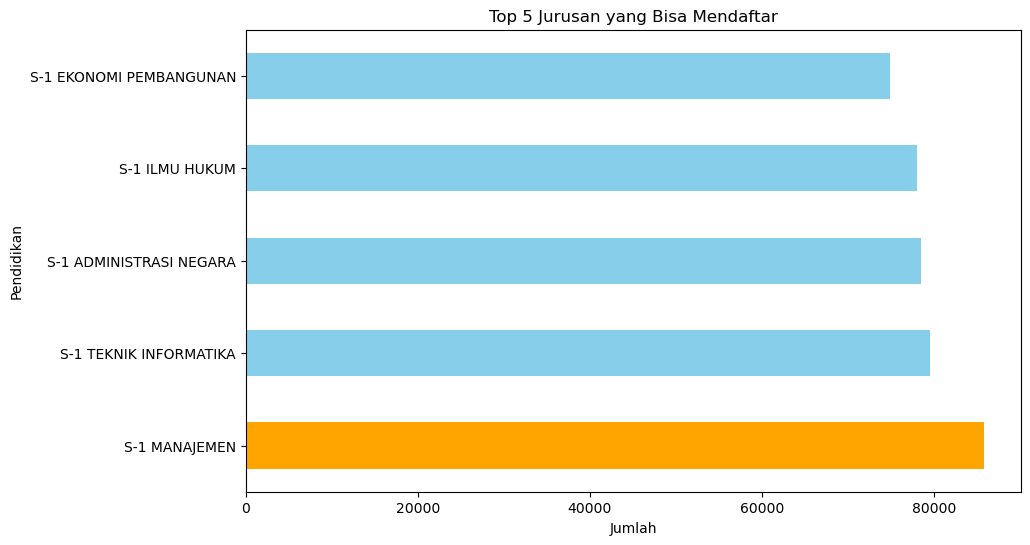

In [5]:
# Menghitung jumlah kemunculan setiap 'pendidikan_nm' dan mengurutkannya secara descending
top_pendidikan = df['pendidikan_nm'].value_counts().sort_values(ascending=False).head(5)

# Membuat grafik bar chart horizontal
plt.figure(
    figsize=(10, 6))
top_pendidikan.plot(kind='barh', color=['skyblue' if x != top_pendidikan.idxmax() else 'orange' for x in top_pendidikan.index])
plt.title('Top 5 Jurusan yang Bisa Mendaftar')
plt.xlabel('Jumlah')
plt.ylabel('Pendidikan')
plt.show()

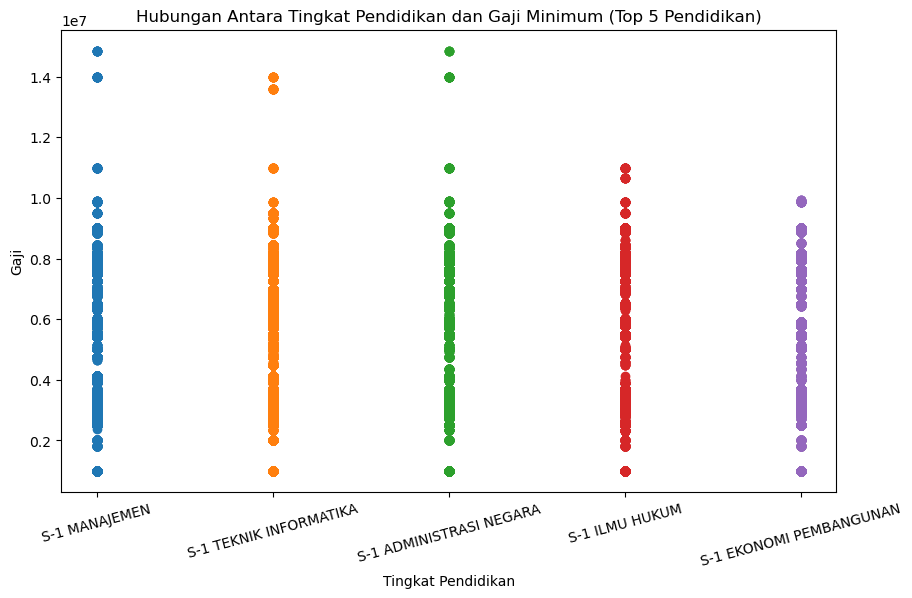

In [24]:
# Menghitung jumlah pekerjaan untuk setiap tingkat pendidikan
pendidikan_count = df['pendidikan_nm'].value_counts()

# Pilih 10 tingkat pendidikan teratas
top_pendidikan = pendidikan_count.head(5).index

# Filter DataFrame untuk 10 tingkat pendidikan teratas
df_top_pendidikan = df[df['pendidikan_nm'].isin(top_pendidikan)]

# Membuat scatter plot untuk melihat hubungan antara tingkat pendidikan dan rentang gaji
plt.figure(figsize=(10, 6))
for pendidikan in top_pendidikan:
    df_temp = df_top_pendidikan[df_top_pendidikan['pendidikan_nm'] == pendidikan]
    plt.scatter(df_temp['pendidikan_nm'], df_temp['gaji_min'], label=f'Gaji Min - {pendidikan}', marker='o')

# Menambahkan label dan judul plot
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Gaji')
plt.title('Hubungan Antara Tingkat Pendidikan dan Gaji Minimum (Top 5 Pendidikan)')
plt.xticks(range(len(top_pendidikan)), top_pendidikan)  # Mengganti label sumbu x dengan tingkat pendidikan
plt.xticks(rotation=15)

# Menampilkan plot
plt.show()

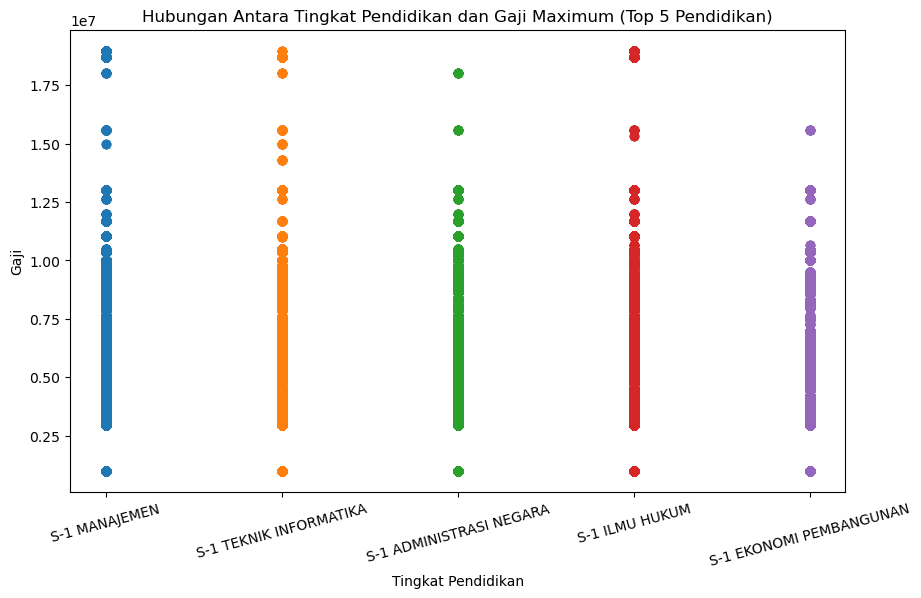

In [23]:
# Menghitung jumlah pekerjaan untuk setiap tingkat pendidikan
pendidikan_count = df['pendidikan_nm'].value_counts()

# Pilih 10 tingkat pendidikan teratas
top_pendidikan = pendidikan_count.head(5).index

# Filter DataFrame untuk 10 tingkat pendidikan teratas
df_top_pendidikan = df[df['pendidikan_nm'].isin(top_pendidikan)]

# Membuat scatter plot untuk melihat hubungan antara tingkat pendidikan dan rentang gaji
plt.figure(figsize=(10, 6))
for pendidikan in top_pendidikan:
    df_temp = df_top_pendidikan[df_top_pendidikan['pendidikan_nm'] == pendidikan]
    plt.scatter(df_temp['pendidikan_nm'], df_temp['gaji_max'], label=f'Gaji Mas - {pendidikan}', marker='o')

# Menambahkan label dan judul plot
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Gaji')
plt.title('Hubungan Antara Tingkat Pendidikan dan Gaji Maximum (Top 5 Pendidikan)')
plt.xticks(range(len(top_pendidikan)), top_pendidikan)  # Mengganti label sumbu x dengan tingkat pendidikan
plt.xticks(rotation=15)

# Menampilkan plot
plt.show()

## Analisis Formasi Pekerjaan

In [25]:
df_new = df.reset_index(drop=False)

In [26]:
df_new.head()

,index,ins_nm,jp_nama,formasi_nm,jabatan_nm,lokasi_nm,pendidikan_nm,gaji_min,gaji_max,jumlah_formasi
0,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,19
1,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III GEOMATIKA,2647200,5147200,19
2,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III PERTANAHAN,2647200,5147200,19
3,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III TEKNIK GEODESI,2647200,5147200,19
4,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III GEOGRAFI,2647200,5147200,19


In [30]:
# Menghilangkan duplikat berdasarkan index
df_unique_index = df_new.reset_index().drop_duplicates(subset='index').set_index('index')

# Menampilkan DataFrame setelah menghilangkan duplikat
df_unique_index.head()

,level_0,ins_nm,jp_nama,formasi_nm,jabatan_nm,lokasi_nm,pendidikan_nm,gaji_min,gaji_max,jumlah_formasi
index,,,,,,,,,,
0,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,19
1,5,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - ACEH,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,15
2,10,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - LAMPUNG,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,12
3,15,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - NUSA TENGGARA TIMUR,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,12
4,20,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - PAPUA,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,12


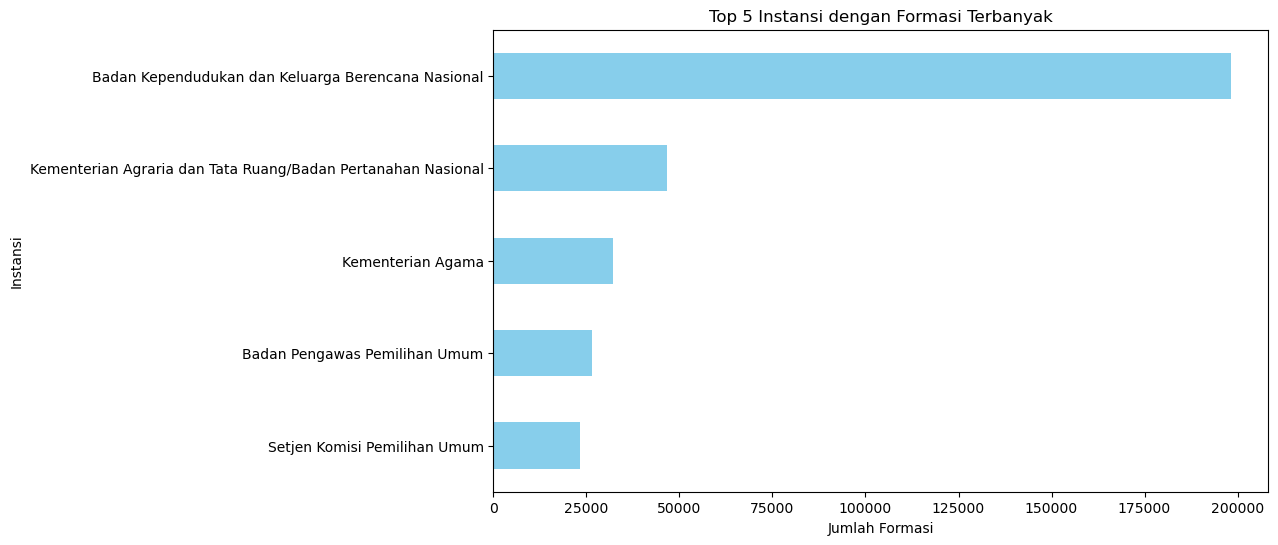

In [28]:
# Menghitung jumlah formasi untuk setiap instansi
top_instansi = df_unique_index.groupby('ins_nm')['jumlah_formasi'].sum().sort_values(ascending=False).head(5)

# Membuat grafik bar chart horizontal
plt.figure(figsize=(10, 6))
top_instansi.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 5 Instansi dengan Formasi Terbanyak')
plt.xlabel('Jumlah Formasi')
plt.ylabel('Instansi')
plt.show()

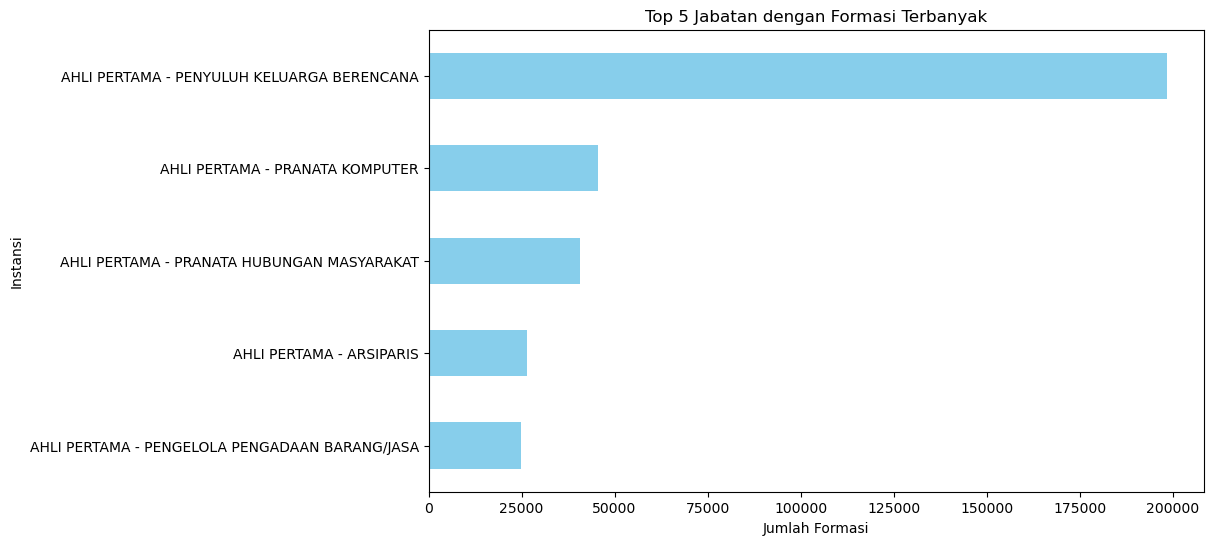

In [29]:
# Menghitung jumlah formasi untuk setiap instansi
top_instansi = df_unique_index.groupby('jabatan_nm')['jumlah_formasi'].sum().sort_values(ascending=False).head(5)

# Membuat grafik bar chart horizontal
plt.figure(figsize=(10, 6))
top_instansi.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 5 Jabatan dengan Formasi Terbanyak')
plt.xlabel('Jumlah Formasi')
plt.ylabel('Instansi')
plt.show()

## Analisis Lokasi Instansi

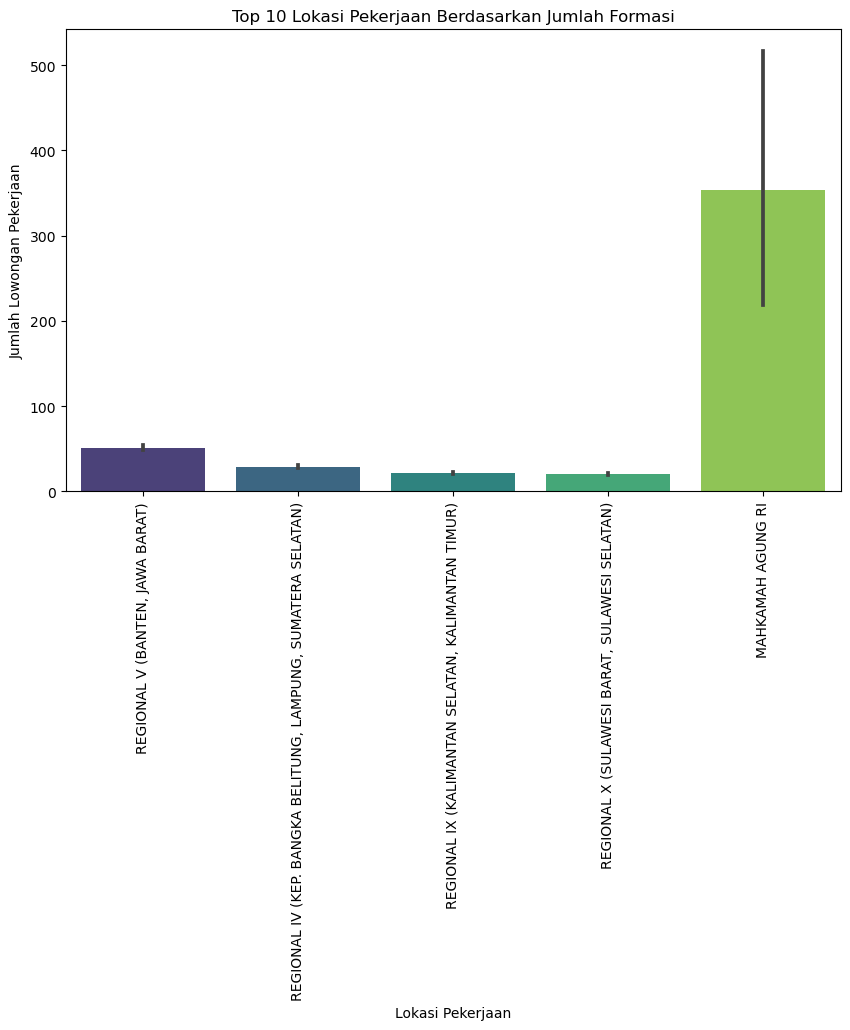

In [46]:
# Menghitung top 10 lokasi pekerjaan berdasarkan jumlah_formasi
top_lokasi = df_unique_index.groupby('lokasi_nm')['jumlah_formasi'].sum().nlargest(5).index

# Filter DataFrame untuk top 10 lokasi
df_top_lokasi = df_unique_index[df_unique_index['lokasi_nm'].isin(top_lokasi)]

# Membuat bar chart untuk melihat jumlah lowongan pekerjaan top 10 lokasi
plt.figure(figsize=(10, 6))
sns.barplot(x='lokasi_nm', y='jumlah_formasi', data=df_top_lokasi, palette='viridis')
plt.xlabel('Lokasi Pekerjaan')
plt.ylabel('Jumlah Lowongan Pekerjaan')
plt.title('Top 10 Lokasi Pekerjaan Berdasarkan Jumlah Formasi')
plt.xticks(rotation=90)
plt.show()

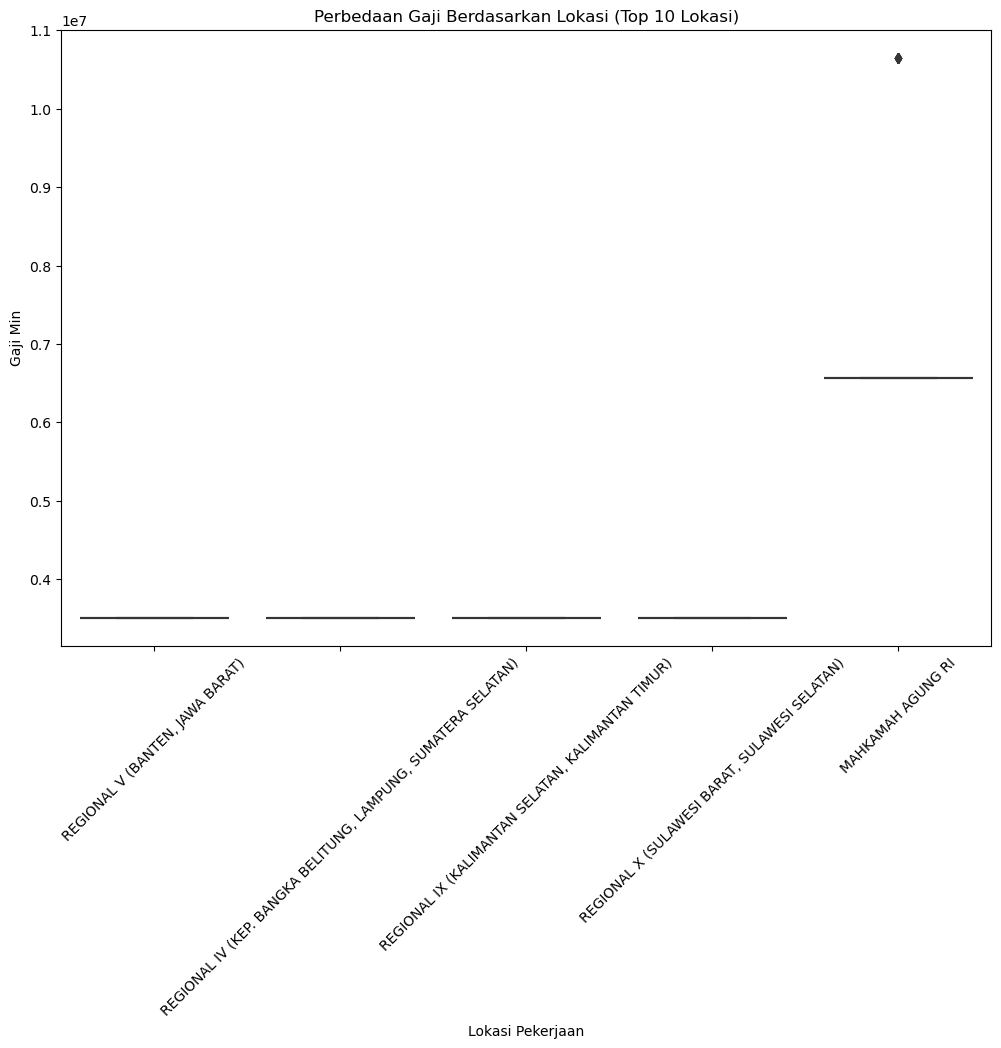

In [48]:
# Membuat boxplot untuk melihat perbedaan gaji berdasarkan lokasi
plt.figure(figsize=(12, 8))
sns.boxplot(x='lokasi_nm', y='gaji_min', data=df_top_lokasi, palette='viridis')
plt.xlabel('Lokasi Pekerjaan')
plt.ylabel('Gaji Min')
plt.title('Perbedaan Gaji Berdasarkan Lokasi (Top 10 Lokasi)')
plt.xticks(rotation=45)
plt.show()

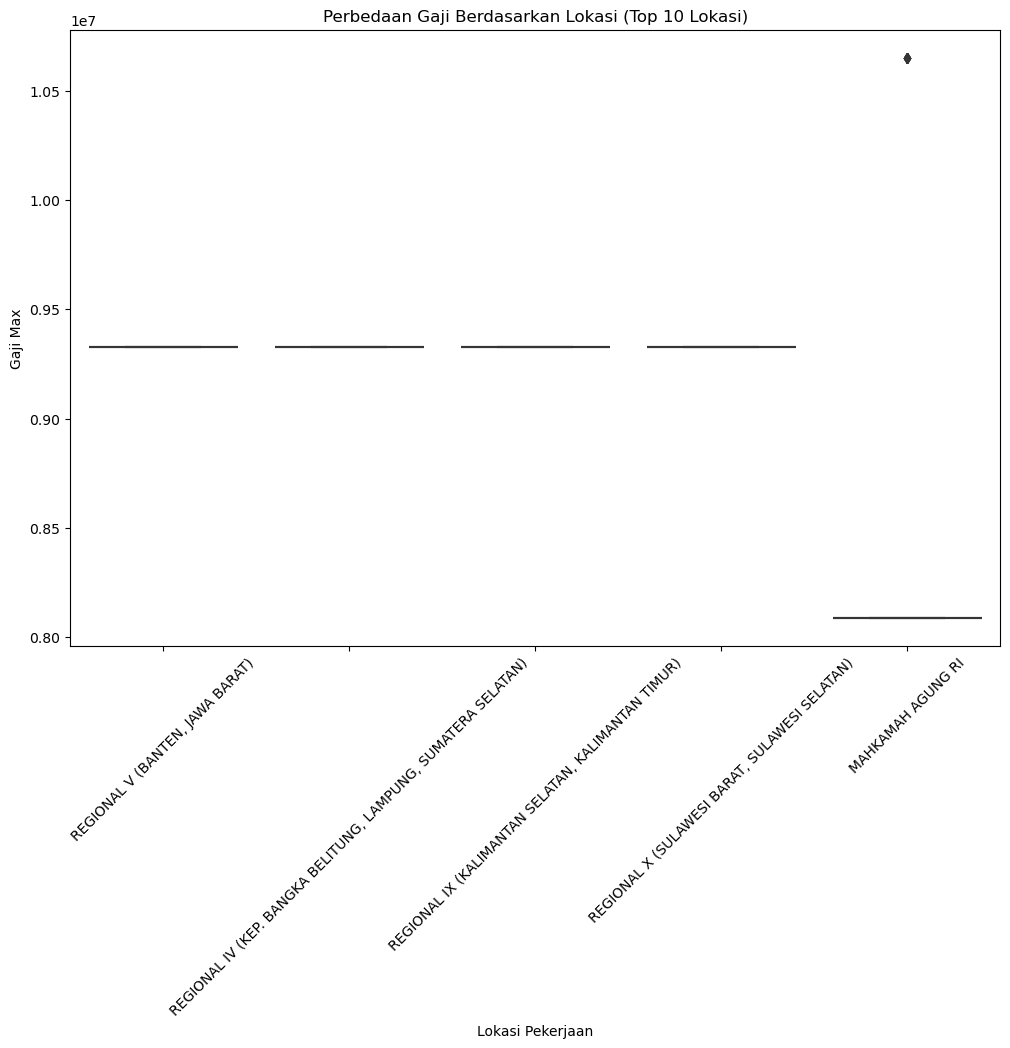

In [53]:
# Membuat boxplot untuk melihat perbedaan gaji berdasarkan lokasi
plt.figure(figsize=(12, 8))
sns.boxplot(x='lokasi_nm', y='gaji_max', data=df_top_lokasi, palette='viridis')
plt.xlabel('Lokasi Pekerjaan')
plt.ylabel('Gaji Max')
plt.title('Perbedaan Gaji Berdasarkan Lokasi (Top 10 Lokasi)')
plt.xticks(rotation=45)
plt.show()

## Analisis Gaji Masing-masing Formasi

In [8]:
# Melihat instansi dengan tawaran gaji tertinggi
gaji_tertinggi = df['gaji_max'].max()
ins_gaji_tertinggi = df[df['gaji_max'] == gaji_tertinggi].groupby('ins_nm').first()[['gaji_min','gaji_max']]
print(ins_gaji_tertinggi)

                           gaji_min  gaji_max
ins_nm                                       
Pemerintah Kab. Bengkalis   2966500  41665000


In [7]:
# Melihat instansi dengan tawaran gaji terendah
gaji_terendah = df['gaji_min'].min()

# Menggunakan groupby dan mengambil baris pertama dari setiap kelompok
ins_gaji_terendah = df[df['gaji_min'] == gaji_terendah].groupby('ins_nm').first()[['gaji_min','gaji_max']]

# Menampilkan instansi dengan gaji terendah, satu baris per instansi
print(ins_gaji_terendah)

                                 gaji_min  gaji_max
ins_nm                                             
Pemerintah Kab. Halmahera Timur   1000000   1000000
Pemerintah Kab. Sumbawa           1000000   3000000


c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


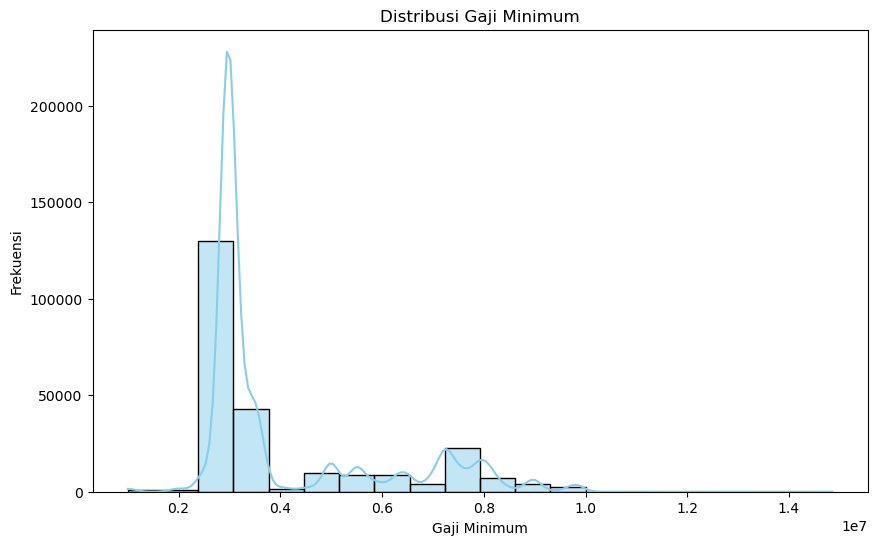

In [60]:
# Membuat histogram untuk distribusi gaji minimum
plt.figure(figsize=(10, 6))
sns.histplot(df_unique_index['gaji_min'], bins=20, kde=True, color='skyblue')
plt.xlabel('Gaji Minimum')
plt.ylabel('Frekuensi')
plt.title('Distribusi Gaji Minimum')
plt.show()

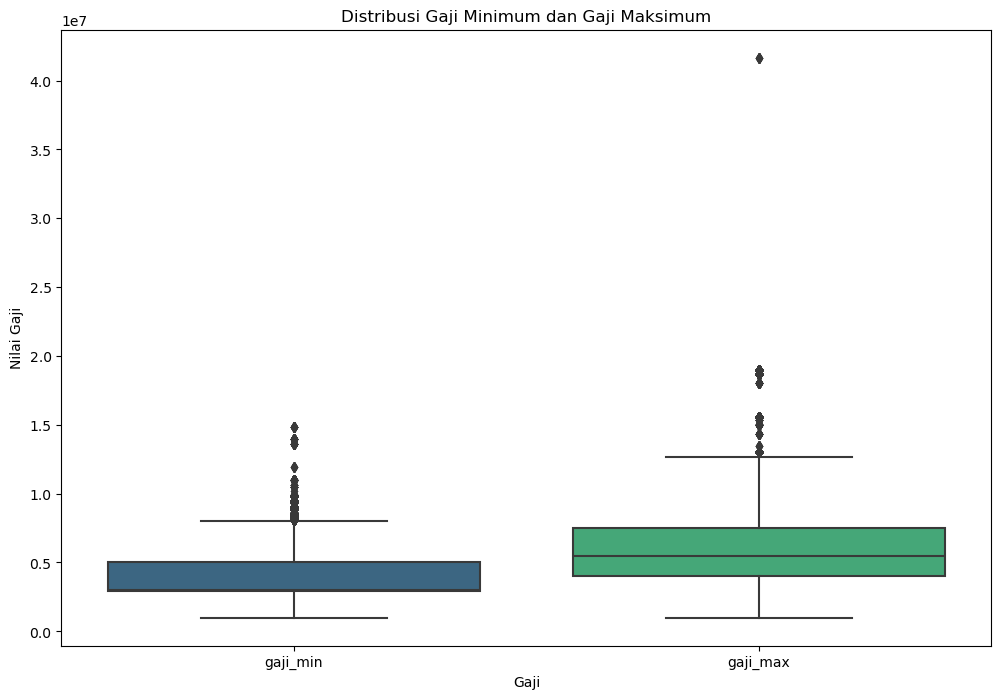

In [55]:
# Membuat boxplot untuk distribusi gaji minimum dan gaji maksimum
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_unique_index[['gaji_min', 'gaji_max']], palette='viridis')
plt.xlabel('Gaji')
plt.ylabel('Nilai Gaji')
plt.title('Distribusi Gaji Minimum dan Gaji Maksimum')
plt.show()